# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score


from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.linear_model import LogisticRegression



# Read Tables

In [ ]:
# train = pd.read_csv(r"D:\Inceptez\Data Science\Datasets\cross_sell-prediction\train.csv")
# test = pd.read_csv(r"D:\Inceptez\Data Science\Datasets\cross_sell-prediction\test.csv")

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
train = pd.read_csv(r'/content/gdrive/MyDrive/Datasets/CrossSell-Prediction/train.csv')
test = pd.read_csv(r'/content/gdrive/MyDrive/Datasets/CrossSell-Prediction/test.csv')

In [ ]:
train.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


In [ ]:
test.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199


# Defining Functions

In [ ]:
def get_metadata(dataframe):
    '''Gets all the Metadata Information about the Dataframe'''
    print("\nBASIC INFORMATION\n")
    print(dataframe.info())
    print("=" * 80)
    print("STATISTICAL INFORMATION\n")
    display(dataframe.describe(include='all').T)
    print("=" * 80)
    print("Dataframe Shape\n", dataframe.shape)
    print("=" * 80)
    print("Number of Duplicate Rows\n", dataframe.duplicated().sum())
    print("=" * 80)
    print("NULL Values Check")
    for col in dataframe.columns:
        print(col, dataframe[col].isnull().sum())
    print("=" * 80)
    print("UNIQUE VALUES IN EVERY COLUMN")
    for col in dataframe.columns:
        print(col)
        print(dataframe[col].unique())
        print('-' * 80)
    categorical_cols = [var for var in dataframe.columns if dataframe[var].dtype=='O']
    numerical_cols = [var for var in dataframe.columns if dataframe[var].dtype!='O']
    print("CATEGORICAL FEATURES\n", categorical_cols)
    print("=" * 80)
    print("NUMERICAL FEATURES\n", numerical_cols)
    print("=" * 80)
    print("Negative Valued Column")
    for col in numerical_cols:
        if min(dataframe[col]) < 0:
            print(col)
    print("=" * 80)
    display(dataframe.head(3))

In [ ]:
def naive_bayes_model(model, X_train, X_test, Y_train, Y_test):
    # model: GaussianNB(), MultMultinomialNB(), BernoBernoulliNB()
    print("Model\n", model)
    print("Training Model...\n")
    model.fit(X_train, Y_train)
    
    print("Model Prediction...")
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    print("Y_train_Pred")
    print("Confusion Matrix\n", confusion_matrix(Y_train, Y_train_pred))
    print("-" * 80)
    print("Accuracy Score\n", accuracy_score(Y_train, Y_train_pred))
    print("-" * 80)
    print("Classification Report\n", classification_report(Y_train, Y_train_pred))

    print("Y_test_Pred")
    print("Confusion Matrix\n", confusion_matrix(Y_test, Y_test_pred))
    print("-" * 80)
    print("Accuracy Score\n", accuracy_score(Y_test, Y_test_pred))
    print("-" * 80)
    print("Classification Report\n", classification_report(Y_test, Y_test_pred))

In [ ]:
def logistic_regression(model, X_train, X_test, Y_train, Y_test):
    print("Model\n", model)
    print("Training Model...\n")
    model.fit(X_train, Y_train)

    print("Model Prediction...")
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    print("Y_train_Pred")
    print("Confusion Matrix\n", confusion_matrix(Y_train, Y_train_pred))
    print("-" * 80)
    print("Accuracy Score\n", accuracy_score(Y_train, Y_train_pred))
    print("-" * 80)
    print("Classification Report\n", classification_report(Y_train, Y_train_pred))
    print("-" * 80)
    print("ROC_AUC")
    print(roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1]))

    print("=" * 80)

    print("Y_test_Pred")
    print("Confusion Matrix\n", confusion_matrix(Y_test, Y_test_pred))
    print("-" * 80)
    print("Accuracy Score\n", accuracy_score(Y_test, Y_test_pred))
    print("-" * 80)
    print("Classification Report\n", classification_report(Y_test, Y_test_pred)) 
    print("-" * 80)
    print("ROC_AUC\n") 
    print(roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))
  

In [ ]:
def knn_model(k, X_train, X_test, Y_train, Y_test, weights='uniform', metric='minkowski'):
    # weights: uniform, distance ; metric: minkowski, euclidean, manhattan, cosine
    knn = KNeighborsClassifier(n_neighbors = k, weights=weights, metric=metric)
    print("No of Neighbors : ", k)
    print("Weights :", weights)
    print("Metric : ", metric)
    
    print("Training Model...\n")
    knn.fit(X_train, Y_train)
    
    print("Model Prediction...")
    Y_pred = knn.predict(X_test)
    
    print("=" * 80)
    print("Confusion Matrix\n", confusion_matrix(Y_test, Y_pred))
    print("=" * 80)
    print("Accuracy Score\n", accuracy_score(Y_test, Y_pred))
    print("=" * 80)
    print("Classification Report\n", classification_report(Y_test, Y_pred))

# EDA

In [ ]:
get_metadata(train)


BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 34.9 MB
None
STATISTICAL INFORMATION



,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Gender,381109.0,0.540761,0.498336,0.0,0.0,1.0,1.0,1.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Vehicle_Age,381109.0,0.609616,0.567439,0.0,0.0,1.0,1.0,2.0
Vehicle_Damage,381109.0,0.504877,0.499977,0.0,0.0,1.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0


Dataframe Shape
 (381109, 12)
Number of Duplicate Rows
 0
NULL Values Check
id 0
Gender 0
Age 0
Driving_License 0
Region_Code 0
Previously_Insured 0
Vehicle_Age 0
Vehicle_Damage 0
Annual_Premium 0
Policy_Sales_Channel 0
Vintage 0
Response 0
UNIQUE VALUES IN EVERY COLUMN
id
[     1      2      3 ... 381107 381108 381109]
--------------------------------------------------------------------------------
Gender
[1 0]
--------------------------------------------------------------------------------
Age
[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
--------------------------------------------------------------------------------
Driving_License
[1 0]
--------------------------------------------------------------------------------
Region_Code
[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7.

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1


In [ ]:
# get_metadata(test)

## Value Counts

In [ ]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

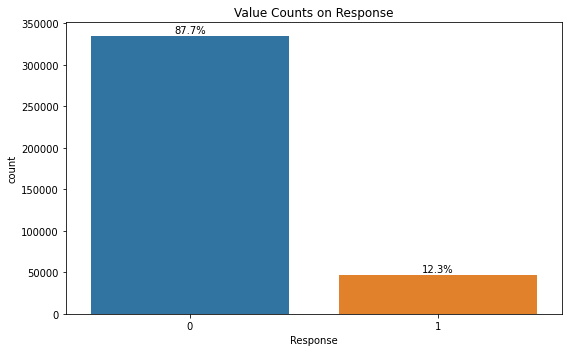

In [ ]:
plt.figure(figsize=(8, 5))
resp_count = sns.countplot(x='Response', data=train)
plt.title('Value Counts on Response')
total = len(train)
for p in resp_count.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    resp_count.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

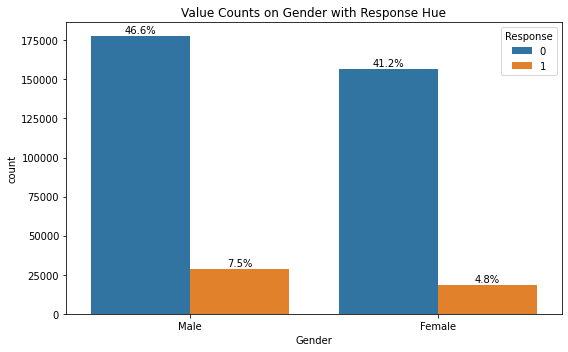

In [ ]:
plt.figure(figsize=(8, 5))
resp_count = sns.countplot(x='Gender', hue = 'Response', data=train)
plt.title('Value Counts on Gender with Response Hue')
total = len(train)
for p in resp_count.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    resp_count.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

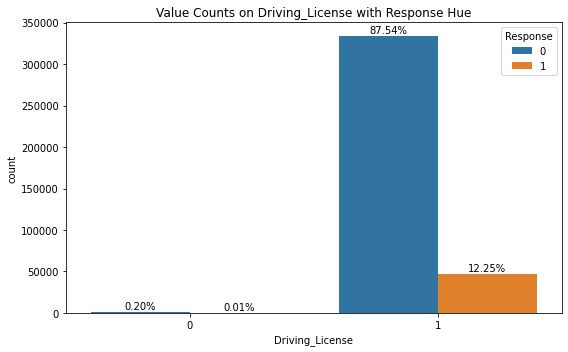

In [ ]:
plt.figure(figsize=(8, 5))
resp_count = sns.countplot(x='Driving_License', hue = 'Response', data=train)
plt.title('Value Counts on Driving_License with Response Hue')
total = len(train)
for p in resp_count.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    resp_count.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

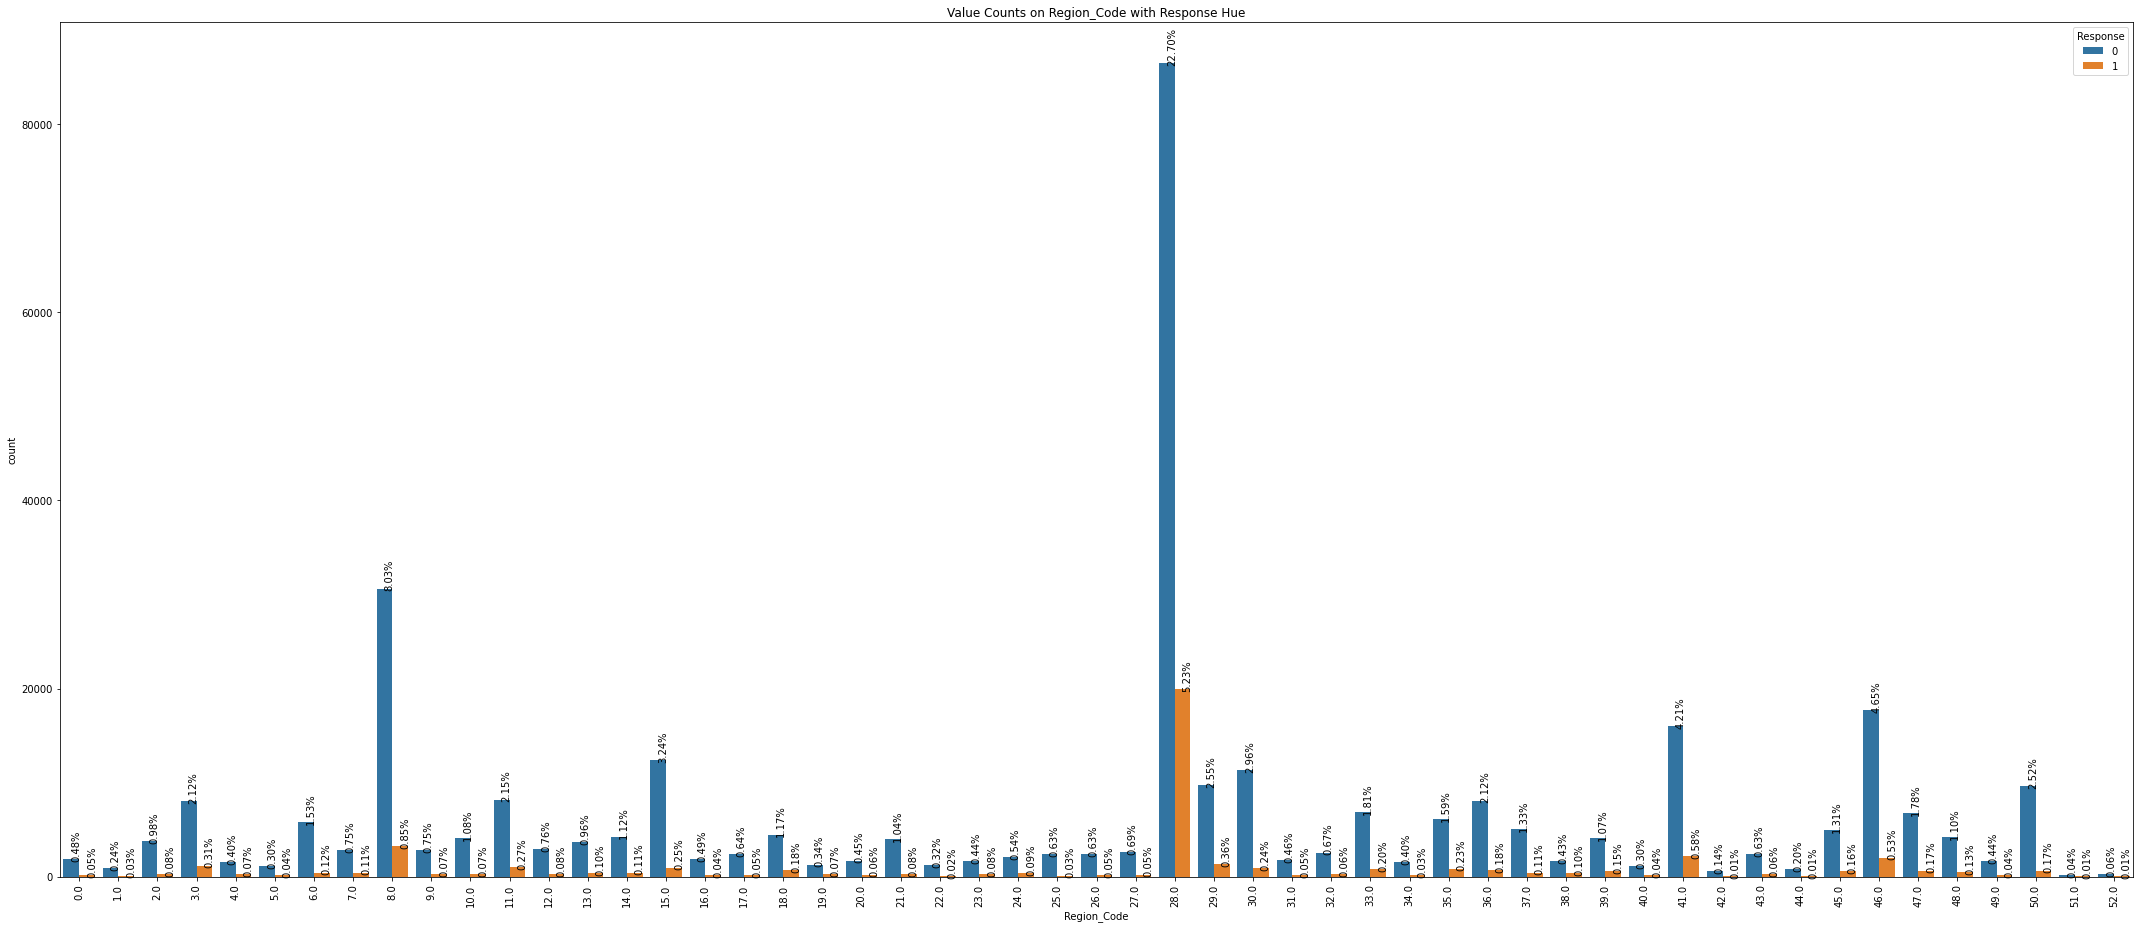

In [ ]:
plt.figure(figsize=(30, 13))
resp_count = sns.countplot(x='Region_Code', data=train, hue='Response')
plt.title('Value Counts on Region_Code with Response Hue')
total = len(train)
for p in resp_count.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    resp_count.annotate(percentage, (x, y), rotation=90)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

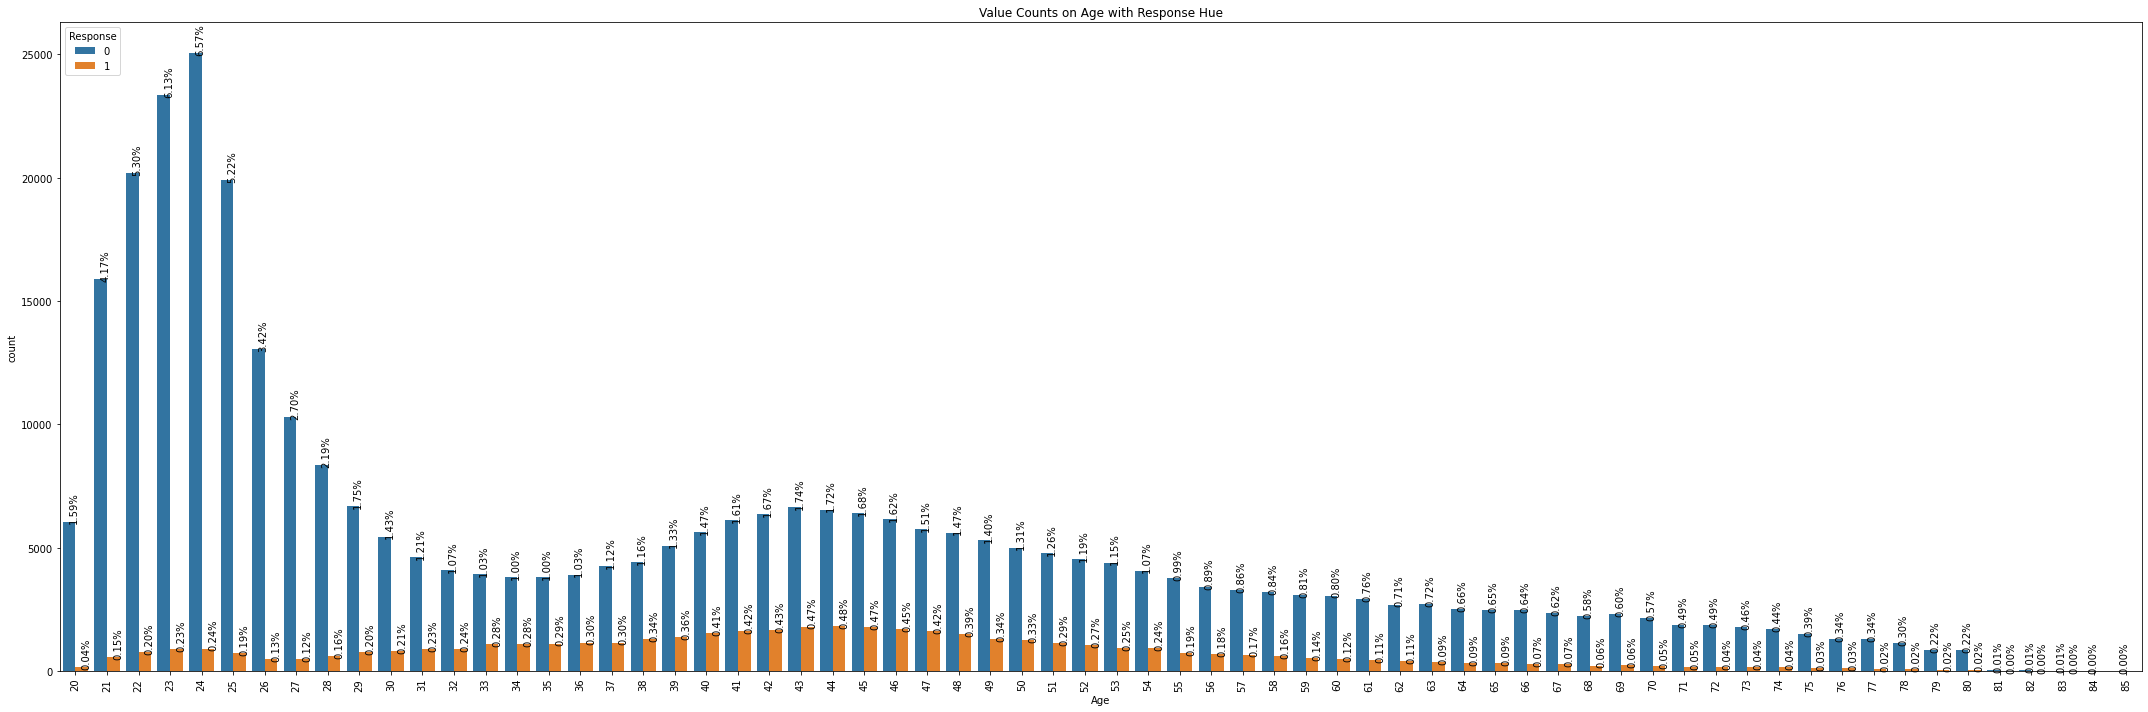

In [ ]:
plt.figure(figsize=(30, 10))
resp_count = sns.countplot(x='Age', data=train, hue='Response')
plt.title('Value Counts on Age with Response Hue')
total = len(train)
for p in resp_count.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    resp_count.annotate(percentage, (x, y), rotation=90)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

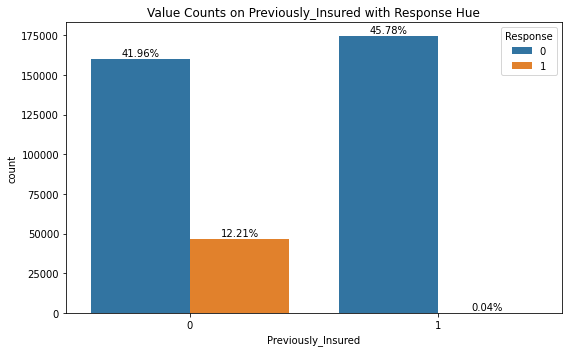

In [ ]:
plt.figure(figsize=(8, 5))
resp_count = sns.countplot(x='Previously_Insured', hue = 'Response', data=train)
plt.title('Value Counts on Previously_Insured with Response Hue')
total = len(train)
for p in resp_count.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    resp_count.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

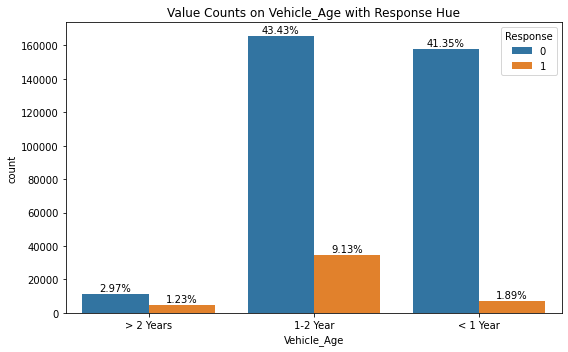

In [ ]:
plt.figure(figsize=(8, 5))
resp_count = sns.countplot(x='Vehicle_Age', hue = 'Response', data=train)
plt.title('Value Counts on Vehicle_Age with Response Hue')
total = len(train)
for p in resp_count.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    resp_count.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

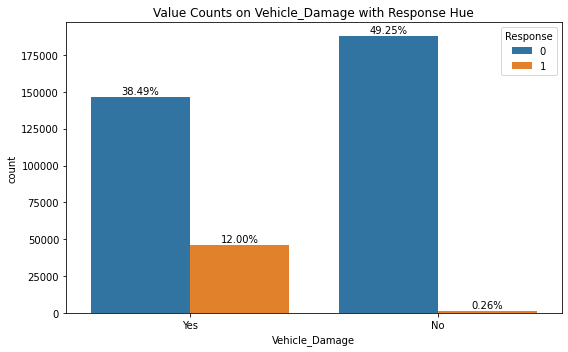

In [ ]:
plt.figure(figsize=(8, 5))
resp_count = sns.countplot(x='Vehicle_Damage', hue = 'Response', data=train)
plt.title('Value Counts on Vehicle_Damage with Response Hue')
total = len(train)
for p in resp_count.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    resp_count.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

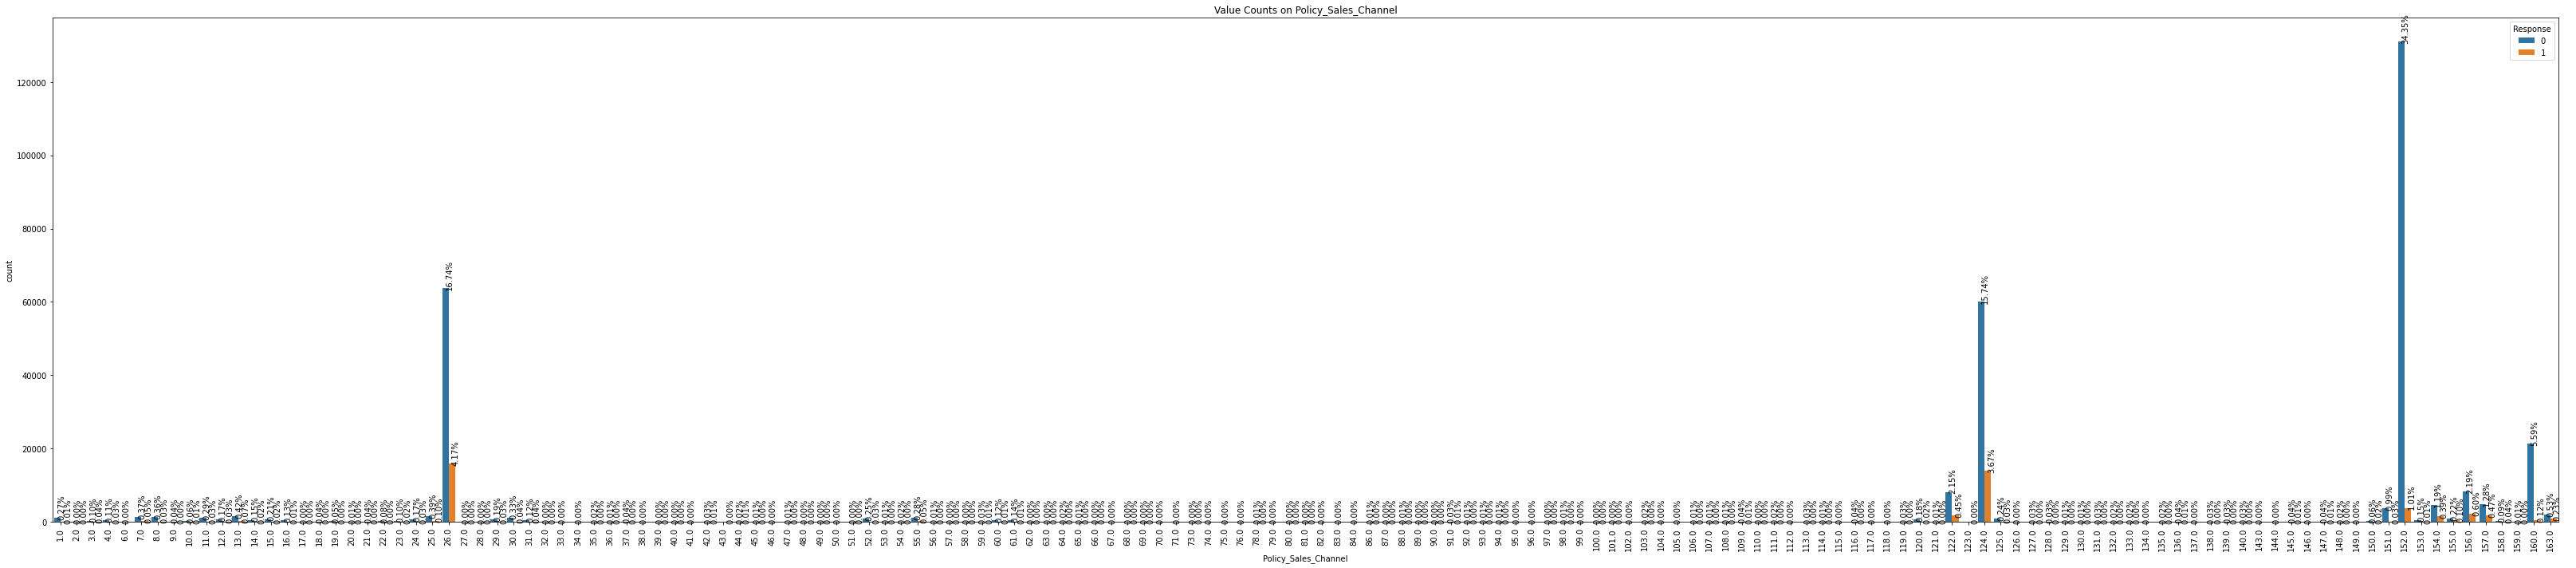

In [ ]:
plt.figure(figsize=(45, 10))
resp_count = sns.countplot(x='Policy_Sales_Channel', data=train, hue='Response')
plt.title('Value Counts on Policy_Sales_Channel')
total = len(train)
for p in resp_count.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    resp_count.annotate(percentage, (x, y), rotation=90)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

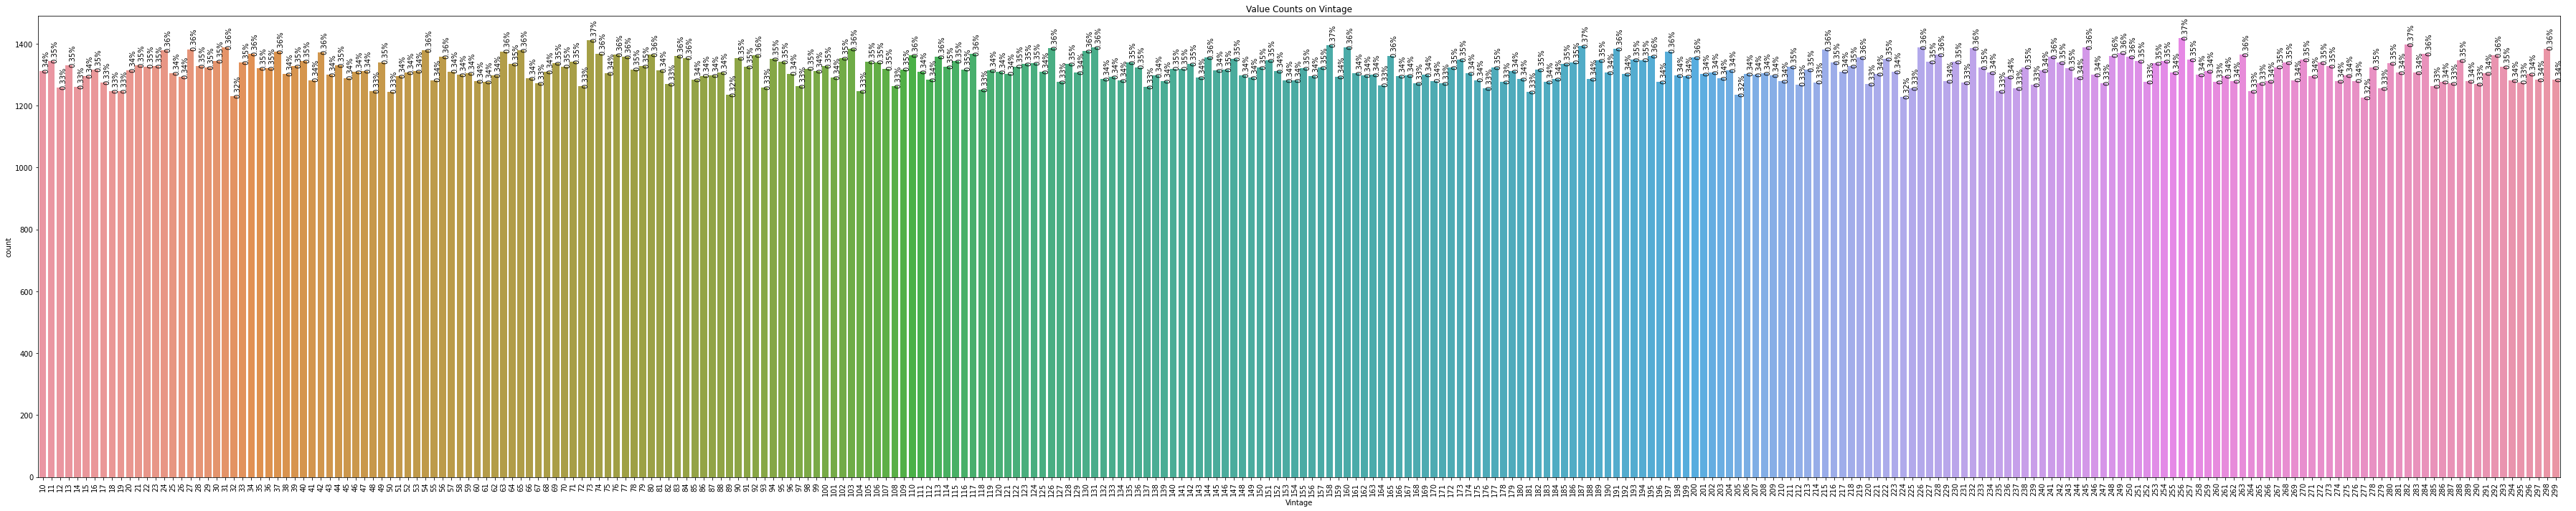

In [ ]:
plt.figure(figsize=(50, 10))
resp_count = sns.countplot(x='Vintage', data=train)
plt.title('Value Counts on Vintage')
total = len(train)
for p in resp_count.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    resp_count.annotate(percentage, (x, y), rotation=90)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# train.groupby('Gender').size().plot(kind='bar')

## Feature Selection

In [ ]:
corr_matrix = train.corr()
corr_matrix.style.background_gradient(cmap='YlGn').set_precision(3)

<ipython-input-25-77f55855aeb9>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_matrix.style.background_gradient(cmap='YlGn').set_precision(3)


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000,0.002,-0.001,-0.001,0.002,0.003,-0.003,-0.001,-0.001
Age,0.002,1.000,-0.080,0.043,-0.255,0.068,-0.578,-0.001,0.111
Driving_License,-0.001,-0.080,1.000,-0.001,0.015,-0.012,0.044,-0.001,0.010
Region_Code,-0.001,0.043,-0.001,1.000,-0.025,-0.011,-0.042,-0.003,0.011
Previously_Insured,0.002,-0.255,0.015,-0.025,1.000,0.004,0.219,0.003,-0.341
Annual_Premium,0.003,0.068,-0.012,-0.011,0.004,1.000,-0.113,-0.001,0.023
Policy_Sales_Channel,-0.003,-0.578,0.044,-0.042,0.219,-0.113,1.000,0.000,-0.139
Vintage,-0.001,-0.001,-0.001,-0.003,0.003,-0.001,0.000,1.000,-0.001
Response,-0.001,0.111,0.010,0.011,-0.341,0.023,-0.139,-0.001,1.000


In [ ]:
# cs = pd.DataFrame()
# cs['features'] = train.columns
# cs['Variance_Inflation_Factor'] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
# cs

In [ ]:
# train_1 = train.drop(['Driving_License', 'Age'], axis=1)
# cs_1 = pd.DataFrame()
# cs_1['features'] = train_1.columns
# cs_1['Variance_Inflation_Factor'] = [variance_inflation_factor(train_1.values, i) for i in range(len(train_1.columns))]
# cs_1

# Pre-processing

In [ ]:
train.replace({'Gender': {'Male': 1, 'Female': 0}}, inplace=True)
test.replace({'Gender': {'Male': 1, 'Female': 0}}, inplace=True)

In [ ]:
train.replace({'Vehicle_Damage': {'Yes': 1, 'No': 0}}, inplace=True)
test.replace({'Vehicle_Damage': {'Yes': 1, 'No': 0}}, inplace=True)

In [ ]:
train.replace({'Vehicle_Age': {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}}, inplace=True)
test.replace({'Vehicle_Age': {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}}, inplace=True)

### OneHot Encoding

In [ ]:
train_ohe = pd.get_dummies(train, columns = ['Region_Code', 'Policy_Sales_Channel'])

In [ ]:
train_ohe.drop(['Region_Code_0.0', 'Policy_Sales_Channel_1.0'], axis=1, inplace=True)

In [ ]:
test_ohe = pd.get_dummies(test, columns = ['Region_Code', 'Policy_Sales_Channel'])
test_ohe.drop(['Region_Code_0.0', 'Policy_Sales_Channel_1.0'], axis=1, inplace=True)

In [ ]:
train_ohe['Policy_Sales_Channel_141.0'] = 0
train_ohe['Policy_Sales_Channel_142.0'] = 0

### Train-Test Split

In [ ]:
X=train_ohe.drop(['id', 'Response'], axis=1)
Y=train['Response']

In [ ]:
X

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_1.0,Region_Code_2.0,...,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_159.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0,Policy_Sales_Channel_141.0,Policy_Sales_Channel_142.0
0,1,44,1,0,2,1,40454.0,217,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,76,1,0,1,0,33536.0,183,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,47,1,0,2,1,38294.0,27,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,21,1,1,0,0,28619.0,203,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,29,1,1,0,0,27496.0,39,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,1,1,0,30170.0,88,0,0,...,0,0,0,0,0,0,0,0,0,0
381105,1,30,1,1,0,0,40016.0,131,0,0,...,0,0,0,0,0,0,0,0,0,0
381106,1,21,1,1,0,0,35118.0,161,0,0,...,0,0,0,0,0,0,1,0,0,0
381107,0,68,1,0,2,1,44617.0,74,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=16, stratify=Y)

## Scaling

In [ ]:
std_scaler = StandardScaler()

In [ ]:
std_scaler.fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.92279833, -1.02032737,  0.04691945, ..., -0.08697684,
         0.        ,  0.        ],
       [ 0.92279833, -0.76246667,  0.04691945, ..., -0.08697684,
         0.        ,  0.        ],
       [-1.0836604 , -0.89139702,  0.04691945, ..., -0.08697684,
         0.        ,  0.        ],
       ...,
       [ 0.92279833, -0.63353632,  0.04691945, ..., -0.08697684,
         0.        ,  0.        ],
       [ 0.92279833,  2.33186178,  0.04691945, ..., -0.08697684,
         0.        ,  0.        ],
       [ 0.92279833, -0.82693184,  0.04691945, ..., -0.08697684,
         0.        ,  0.        ]])

## Oversampling - SMOTE

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

Before OverSampling, counts of label '1': 32697
Before OverSampling, counts of label '0': 234079 



In [ ]:
sm = SMOTE(random_state = 2)
X_train_os, Y_train_os = sm.fit_resample(X_train, Y_train)

X_train_sc_os, Y_train_sc_os = sm.fit_resample(X_train_scaled, Y_train)

In [ ]:
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_sc_os == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(Y_train_sc_os == 0)))

After OverSampling, counts of label '1': 234079
After OverSampling, counts of label '0': 234079 



In [ ]:
# X_train_os

## UnderSampling - NearMiss

In [ ]:
print("Before UnderSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

Before UnderSampling, counts of label '1': 32697
Before UnderSampling, counts of label '0': 234079 



In [ ]:
nm = NearMiss()
X_train_us, Y_train_us = nm.fit_resample(X_train, Y_train)
X_train_sc_us, Y_train_sc_us = nm.fit_resample(X_train_scaled, Y_train)

KeyboardInterrupt: ignored

In [ ]:
print("After UnderSampling, counts of label '1': {}".format(sum(Y_train_us == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(Y_train_us == 0)))

# Model

## Naive Bayes

In [ ]:
gaussian_model = GaussianNB()

In [ ]:
naive_bayes_model(gaussian_model, X_train, X_test, Y_train, Y_test)

Model
 GaussianNB()
Training Model...

Model Prediction...
Y_train_Pred
Confusion Matrix
 [[192227  41852]
 [ 15323  17374]]
--------------------------------------------------------------------------------
Accuracy Score
 0.7856816205355804
--------------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.82      0.87    234079
           1       0.29      0.53      0.38     32697

    accuracy                           0.79    266776
   macro avg       0.61      0.68      0.62    266776
weighted avg       0.85      0.79      0.81    266776

Y_test_Pred
Confusion Matrix
 [[82204 18116]
 [ 6605  7408]]
--------------------------------------------------------------------------------
Accuracy Score
 0.783780710730935
--------------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   su

In [ ]:
naive_bayes_model(gaussian_model, X_train_os, X_test, Y_train_os, Y_test)

Model
 GaussianNB()
Training Model...

Model Prediction...
Y_train_Pred
Confusion Matrix
 [[115148 118931]
 [  1214 232865]]
--------------------------------------------------------------------------------
Accuracy Score
 0.7433665557354568
--------------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.99      0.49      0.66    234079
           1       0.66      0.99      0.79    234079

    accuracy                           0.74    468158
   macro avg       0.83      0.74      0.73    468158
weighted avg       0.83      0.74      0.73    468158

Y_test_Pred
Confusion Matrix
 [[49058 51262]
 [  185 13828]]
--------------------------------------------------------------------------------
Accuracy Score
 0.5500249271863766
--------------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   s

## Logistic Regression

In [ ]:
lgr_lasso = LogisticRegression(penalty='l1', random_state=2, solver='saga')

In [ ]:
lgr_ridge = LogisticRegression(penalty='l2', random_state=2)

In [ ]:
lgr_elasticnet = LogisticRegression(penalty='elasticnet', random_state=2, solver='saga', l1_ratio=0)

In [ ]:
# logistic_regression(lgr_lasso, X_train_scaled, X_test_scaled, Y_train, Y_test)

In [ ]:
logistic_regression(lgr_lasso, X_train_sc_os, X_test_scaled, Y_train_sc_os, Y_test)

Model
 LogisticRegression(penalty='l1', random_state=2, solver='saga')
Training Model...



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Model Prediction...
Y_train_Pred
Confusion Matrix
 [[154067  80012]
 [ 12608 221471]]
--------------------------------------------------------------------------------
Accuracy Score
 0.8021608089576596
--------------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.66      0.77    234079
           1       0.73      0.95      0.83    234079

    accuracy                           0.80    468158
   macro avg       0.83      0.80      0.80    468158
weighted avg       0.83      0.80      0.80    468158

--------------------------------------------------------------------------------
ROC_AUC
0.8529611666651219
Y_test_Pred
Confusion Matrix
 [[65814 34506]
 [  919 13094]]
--------------------------------------------------------------------------------
Accuracy Score
 0.6901594465289986
--------------------------------------------------------------------------------
C

In [ ]:
# logistic_regression(lgr_elasticnet, X_train_scaled, X_test_scaled, Y_train, Y_test)

In [ ]:
logistic_regression(lgr_elasticnet, X_train_sc_os, X_test_scaled, Y_train_sc_os, Y_test)

Model
 LogisticRegression(l1_ratio=0, penalty='elasticnet', random_state=2,
                   solver='saga')
Training Model...



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Model Prediction...
Y_train_Pred
Confusion Matrix
 [[154069  80010]
 [ 12613 221466]]
--------------------------------------------------------------------------------
Accuracy Score
 0.8021544008646654
--------------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.66      0.77    234079
           1       0.73      0.95      0.83    234079

    accuracy                           0.80    468158
   macro avg       0.83      0.80      0.80    468158
weighted avg       0.83      0.80      0.80    468158

--------------------------------------------------------------------------------
ROC_AUC
0.8529615987642843
Y_test_Pred
Confusion Matrix
 [[65815 34505]
 [  919 13094]]
--------------------------------------------------------------------------------
Accuracy Score
 0.6901681929101834
--------------------------------------------------------------------------------
C

In [ ]:
logistic_regression(lgr_ridge, X_train_sc_os, X_test_scaled, Y_train_sc_os, Y_test)

Model
 LogisticRegression(random_state=2)
Training Model...

Model Prediction...
Y_train_Pred
Confusion Matrix
 [[154353  79726]
 [ 12835 221244]]
--------------------------------------------------------------------------------
Accuracy Score
 0.8022868347865464
--------------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.66      0.77    234079
           1       0.74      0.95      0.83    234079

    accuracy                           0.80    468158
   macro avg       0.83      0.80      0.80    468158
weighted avg       0.83      0.80      0.80    468158

--------------------------------------------------------------------------------
ROC_AUC
0.8530606582090206
Y_test_Pred
Confusion Matrix
 [[65945 34375]
 [  930 13083]]
--------------------------------------------------------------------------------
Accuracy Score
 0.6912090122711728
---------------------

In [ ]:
# logistic_regression(lgr_ridge, X_train_sc_us, X_test_scaled, Y_train_sc_us, Y_test)

# Prediction

In [ ]:
test_ = test_ohe.iloc[:, 1:]
test_['Policy_Sales_Channel_104.0'] = 0
test_['Policy_Sales_Channel_143.0'] = 0
test_['Policy_Sales_Channel_144.0'] = 0
test_['Policy_Sales_Channel_149.0'] = 0
test_['Policy_Sales_Channel_27.0'] = 0
test_['Policy_Sales_Channel_28.0'] = 0
test_['Policy_Sales_Channel_41.0'] = 0
test_['Policy_Sales_Channel_50.0'] = 0
test_['Policy_Sales_Channel_67.0'] = 0
test_['Policy_Sales_Channel_68.0'] = 0
test_['Policy_Sales_Channel_75.0'] = 0
test_['Policy_Sales_Channel_84.0'] = 0
test_

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_1.0,Region_Code_2.0,...,Policy_Sales_Channel_144.0,Policy_Sales_Channel_149.0,Policy_Sales_Channel_27.0,Policy_Sales_Channel_28.0,Policy_Sales_Channel_41.0,Policy_Sales_Channel_50.0,Policy_Sales_Channel_67.0,Policy_Sales_Channel_68.0,Policy_Sales_Channel_75.0,Policy_Sales_Channel_84.0
0,1,25,1,1,0,0,35786.0,53,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,40,1,0,1,1,33762.0,111,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,47,1,0,1,1,40050.0,199,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,24,1,1,0,1,37356.0,187,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,27,1,1,0,0,59097.0,297,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,0,26,1,1,0,0,30867.0,56,0,0,...,0,0,0,0,0,0,0,0,0,0
127033,0,38,1,0,1,1,28700.0,165,0,0,...,0,0,0,0,0,0,0,0,0,0
127034,1,21,1,1,0,0,29802.0,74,0,0,...,0,0,0,0,0,0,0,0,0,0
127035,1,71,1,1,1,0,62875.0,265,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_scaled = std_scaler.transform(test_)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
pred = lgr_elasticnet.predict(test_scaled)

In [ ]:
pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
pred_df = pd.DataFrame()
pred_df['id'] = test_ohe['id']
pred_df['Response'] = pred.tolist()
pred_df.value_counts()

id      Response
381110  0           1
465797  0           1
465810  0           1
465809  1           1
465808  0           1
                   ..
423451  1           1
423450  1           1
423449  0           1
423448  0           1
508146  0           1
Length: 127037, dtype: int64

In [ ]:
pred_df.to_csv(r'/content/gdrive/MyDrive/Datasets/CrossSell-Prediction/CrossSellPrediction_submission.csv', index=None)